In [2]:
import numpy as np
import pandas as pd

from nltk.corpus import names
import nltk; nltk.download('stopwords')
# NLTK Stop words
from nltk.corpus import stopwords

import re

from pymorphy2 import MorphAnalyzer

from gensim import corpora, models
from gensim.models import CoherenceModel
from gensim.models import Phrases
from gensim.models.ldamulticore import LdaMulticore
import gensim

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sych_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
russian_stopwords = stopwords.words("russian")
df_sw = pd.read_csv('stopwords.csv', encoding = 'utf-8', sep=";")
for index, row in df_sw.iterrows():
        russian_stopwords.append(row['stopword'])

In [30]:
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [4]:
# Assign spreadsheet filename to `file`
file = 'Все глобалы за существование ЧБ.xlsx'

# Load spreadsheet
xl = pd.ExcelFile(file)

In [145]:
# Print the sheet names
sheet_names_list = xl.sheet_names
df = None

for i in range(len(sheet_names_list)):
    
    print(f'sheet_names_list={sheet_names_list[i]}')
    df_current = xl.parse(sheet_names_list[i])
    df_current = df_current.loc[:,['mesTExt','type','dialogid', 'Mdate']]
    df_current = df_current.drop_duplicates()

    df_current['Mdate'] = pd.to_datetime(df_current['Mdate'],format='%Y-%m-%d')
    df_current['Mdate'] = df_current['Mdate'].dt.date

    df_filter = df_current['type'].isin([1])
    df1 = df_current[df_filter]

    a = df1.groupby(['dialogid', 'Mdate'])['mesTExt'].transform(lambda answer : " ".join(str(x) for x in answer))
    df12= a.to_frame()
    df12 = df12.drop_duplicates()
    #df4 = pd.concat([df12, df1.loc[:,['dialogid','Mdate']]], axis=1)
    #df4 = df4.drop_duplicates()

    #df_filter = df_current['type'].isin([2])
    #df5 = df_current[df_filter]
    #df5 = df5.loc[:,['dialogid', 'Mdate','AgentEmail']]
    #df5 = df5.drop_duplicates()

    #df_req=pd.merge(df4, df5, on=['dialogid', 'Mdate'], how='inner')
    if i>0:
        df = pd.concat([df,df12], axis=0, ignore_index=True, sort=False)
    else:
        df = df12
    
df.to_csv("Заявки в чатбот.csv", encoding = 'utf-16', sep=";", index=False)   


sheet_names_list=май 18
sheet_names_list=Июнь 18
sheet_names_list=Июль 18
sheet_names_list=Авг 18
sheet_names_list=Сент 18
sheet_names_list=Окт 18
sheet_names_list=Ноя 18
sheet_names_list=Дек 18
sheet_names_list=Янв 19
sheet_names_list=Фев 19
sheet_names_list=Март 19
sheet_names_list=Апр 19
sheet_names_list=Май 19
sheet_names_list=Июнь 19
sheet_names_list=Июль 19
sheet_names_list=Авг 19
sheet_names_list=Сен 19
sheet_names_list=Окт 19
sheet_names_list=Ноя 19
sheet_names_list=Дек 19
sheet_names_list=Янв 20
sheet_names_list=Фев 20
sheet_names_list=Март 20
sheet_names_list=Апр 20


In [91]:
!pip install html2text

In [118]:
!pip install BeautifulSoup4

In [146]:
df["without_punctuation_text"] = df["mesTExt"].replace('—','-')

In [147]:
deleted_symbols = r'[\\\\\'[\]!"$%&()*+,-./:;<=>?@^_`{|}~«»\n]'
func = lambda text : re.sub(deleted_symbols, ' ', text)
df["without_punctuation_text"] = df["without_punctuation_text"].apply(func)

In [148]:
df.head()

,mesTExt,without_punctuation_text
0,124 1 Привет,124 1 Привет
1,Привет Привет Привет Пока 1 End Привет 1 11 EN...,Привет Привет Привет Пока 1 End Привет 1 11 EN...
2,Привет Хабаровск 11 У меня сломался ноутбук Не...,Привет Хабаровск 11 У меня сломался ноутбук Не...
3,Я тут 1 11 12 Сок добрый протек Сломан ноутбук...,Я тут 1 11 12 Сок добрый протек Сломан ноутбук...
4,Привет,Привет


In [149]:
#удалим смайлики
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
func = lambda text : re.sub(emoji_pattern, ' ', text)
df["without_punctuation_text"] = df["without_punctuation_text"].apply(func)

In [ ]:
df = pd.read_csv('Заявки в чатбот.csv', encoding = 'utf-16', sep=";")

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20156 entries, 0 to 20155
Data columns (total 2 columns):
mesTExt                     20156 non-null object
without_punctuation_text    20156 non-null object
dtypes: object(2)
memory usage: 315.0+ KB


In [133]:
df.head()

,mesTExt,without_punctuation_text
0,124 1 Привет,124 1 Привет
1,Привет Привет Привет Пока 1 End Привет 1 11 EN...,Привет Привет Привет Пока 1 End Привет 1 11 EN...
2,Привет Хабаровск 11 У меня сломался ноутбук Не...,Привет Хабаровск 11 У меня сломался ноутбук Не...
3,Я тут 1 11 12 Сок добрый протек Сломан ноутбук...,Я тут 1 11 12 Сок добрый протек Сломан ноутбук...
4,Привет,Привет


In [150]:
func = lambda text : ' '.join([elem for elem in str(text).split(' ') if elem.isdigit() == False])   
df['without_numbers_text'] = df["without_punctuation_text"].apply(func)
df.head()

,mesTExt,without_punctuation_text,without_numbers_text
0,124 1 Привет,124 1 Привет,Привет
1,Привет Привет Привет Пока 1 End Привет 1 11 EN...,Привет Привет Привет Пока 1 End Привет 1 11 EN...,Привет Привет Привет Пока End Привет END ПРиве...
2,Привет Хабаровск 11 У меня сломался ноутбук Не...,Привет Хабаровск 11 У меня сломался ноутбук Не...,Привет Хабаровск У меня сломался ноутбук Не ра...
3,Я тут 1 11 12 Сок добрый протек Сломан ноутбук...,Я тут 1 11 12 Сок добрый протек Сломан ноутбук...,Я тут Сок добрый протек Сломан ноутбук ерп вис...
4,Привет,Привет,Привет


In [151]:
df["tokenized_text"] = df['without_numbers_text']
df = df.drop(["without_numbers_text", "without_punctuation_text"], axis=1)
df.head()

,mesTExt,tokenized_text
0,124 1 Привет,Привет
1,Привет Привет Привет Пока 1 End Привет 1 11 EN...,Привет Привет Привет Пока End Привет END ПРиве...
2,Привет Хабаровск 11 У меня сломался ноутбук Не...,Привет Хабаровск У меня сломался ноутбук Не ра...
3,Я тут 1 11 12 Сок добрый протек Сломан ноутбук...,Я тут Сок добрый протек Сломан ноутбук ерп вис...
4,Привет,Привет


In [152]:
n_words = len(set(" ".join(df["tokenized_text"]).split()))
n_words

44813

In [153]:
df["lowercase_text"] = df["tokenized_text"].apply(lambda text : text.lower())
df.head()

,mesTExt,tokenized_text,lowercase_text
0,124 1 Привет,Привет,привет
1,Привет Привет Привет Пока 1 End Привет 1 11 EN...,Привет Привет Привет Пока End Привет END ПРиве...,привет привет привет пока end привет end приве...
2,Привет Хабаровск 11 У меня сломался ноутбук Не...,Привет Хабаровск У меня сломался ноутбук Не ра...,привет хабаровск у меня сломался ноутбук не ра...
3,Я тут 1 11 12 Сок добрый протек Сломан ноутбук...,Я тут Сок добрый протек Сломан ноутбук ерп вис...,я тут сок добрый протек сломан ноутбук ерп вис...
4,Привет,Привет,привет


In [12]:
!pip install pymorphy2

In [154]:
df["lemmatized_text"] = df["lowercase_text"]

In [155]:
def to_lemmatize2(df):
    all_word_str = " ".join(df["lowercase_text"])
    all_word_list = all_word_str.split()
    all_unique_word = pd.Series(all_word_list).unique()
    lemmatized_word_dict = {}
    lemmatizer = MorphAnalyzer()
    for word in all_unique_word:
        lemmatized_word_dict[word] = lemmatizer.normal_forms(word)[0]
    lemm_func = lambda text: ' '.join([lemmatized_word_dict[word] for word in text.split()])
    df['lemmatized_text'] = df['lowercase_text'].apply(lemm_func)
    return df, all_unique_word

In [156]:
%%time
df, _ = to_lemmatize2(df)

Wall time: 12.4 s


In [157]:
df.head(20)

,mesTExt,tokenized_text,lowercase_text,lemmatized_text
0,124 1 Привет,Привет,привет,привет
1,Привет Привет Привет Пока 1 End Привет 1 11 EN...,Привет Привет Привет Пока End Привет END ПРиве...,привет привет привет пока end привет end приве...,привет привет привет пока end привет end приве...
2,Привет Хабаровск 11 У меня сломался ноутбук Не...,Привет Хабаровск У меня сломался ноутбук Не ра...,привет хабаровск у меня сломался ноутбук не ра...,привет хабаровск у я сломаться ноутбук не рабр...
3,Я тут 1 11 12 Сок добрый протек Сломан ноутбук...,Я тут Сок добрый протек Сломан ноутбук ерп вис...,я тут сок добрый протек сломан ноутбук ерп вис...,я тут сок добрый протечь сломать ноутбук ерп в...
4,Привет,Привет,привет,привет
5,Привет Не работает ерп НЕ работает ЕРП Спасибо...,Привет Не работает ерп НЕ работает ЕРП Спасибо...,привет не работает ерп не работает ерп спасибо...,привет не работать ерп не работать ерп спасибо...
6,Ерп Ерп 2 Ерп чинить сволочи будете или нет ? ...,Ерп Ерп Ерп чинить сволочи будете или нет За...,ерп ерп ерп чинить сволочи будете или нет за...,ерп ерп ерп чинить сволочь быть или нет зависн...
7,Висит ЕРП Висит ЕРП END Весит ERP End Висит пр...,Висит ЕРП Висит ЕРП END Весит ERP End Висит пр...,висит ерп висит ерп end весит erp end висит пр...,висеть ерп висеть ерп end весить erp end висет...
8,Мои заказы не загружаются 2 End Не проводится ...,Мои заказы не загружаются End Не проводится ер...,мои заказы не загружаются end не проводится ер...,мой заказ не загружаться end не проводиться ер...
9,Не загружаются заказы Висит ерп проверьте пожа...,Не загружаются заказы Висит ерп проверьте пожа...,не загружаются заказы висит ерп проверьте пожа...,не загружаться заказ висеть ерп проверить пожа...


In [158]:
func = lambda text : ' '.join([elem for elem in str(text).split(' ') if elem not in russian_stopwords and not elem in ['nan', np.nan]])   
df['lemmatized_text_del_stop_words'] = df["lemmatized_text"].apply(func)
df.tail(20)

,mesTExt,tokenized_text,lowercase_text,lemmatized_text,lemmatized_text_del_stop_words
20136,Добрый день! В базе Д11 по арт 449499 Свинина ...,Добрый день В базе Д11 по арт Свинина охл вес...,добрый день в базе д11 по арт свинина охл вес...,добрый день в база д11 по арт свинина охл вес ...,база д11 арт свинина охл вес карточка товар це...
20137,"Добрый день. Не работает апс Выключаешь его, в...",Добрый день Не работает апс Выключаешь его в...,добрый день не работает апс выключаешь его в...,добрый день не работать апс выключать он включ...,апс выключать включать включение компьютер нач...
20138,Добрый день.В автозаказе поставщик Новозеланск...,Добрый день В автозаказе поставщик Новозеланск...,добрый день в автозаказе поставщик новозеланск...,добрый день в автозаказ поставщик новозелански...,автозаказ поставщик новозеланский продукт откр...
20139,Добрый день Не смогу сменить пароль nan но я в...,Добрый день Не смогу сменить пароль nan но я в...,добрый день не смогу сменить пароль nan но я в...,добрый день не смочь сменить пароль nan но я в...,смочь сменить пароль вводить весь вернол вводи...
20140,Доброго утра: Поставщик Ист Лоджистикал. Подтв...,Доброго утра Поставщик Ист Лоджистикал Подтв...,доброго утра поставщик ист лоджистикал подтв...,добрый утро поставщик истый лоджистикал подтве...,поставщик истый лоджистикал подтверждение orde...
20141,Добрый день Сегодня была смена юр.лица на самб...,Добрый день Сегодня была смена юр лица на самб...,добрый день сегодня была смена юр лица на самб...,добрый день сегодня быть смена юр лицо на самб...,сегодня смена юр лицо самбрать оформление рн в...
20142,Доброе утро. \nПрошу перезагрузить RC-LOG59. С...,Доброе утро Прошу перезагрузить RC LOG59 Сп...,доброе утро прошу перезагрузить rc log59 сп...,добрый утро просить перезагрузить rc log59 спа...,просить перезагрузить rc log59 получиться
20143,"Здравствуйте! ПОдскажите, пожалуйста, как пере...",Здравствуйте ПОдскажите пожалуйста как пере...,здравствуйте подскажите пожалуйста как пере...,здравствовать подсказать пожалуйста как переве...,подсказать перевести поставщик edi хотеть напр...
20144,"Да Добрый день.\nНе могу свести заказ, не кото...",Да Добрый день Не могу свести заказ не котор...,да добрый день не могу свести заказ не котор...,да добрый день не мочь свести заказ не который...,свести заказ который вз подтягиваться формиров...
20145,Добрый день! Прошу помочь в настройке работы п...,Добрый день Прошу помочь в настройке работы п...,добрый день прошу помочь в настройке работы п...,добрый день просить помочь в настройка работа ...,просить помочь настройка работа почта удалённы...


In [159]:
text_clean= []
for index, row in df.iterrows():
        text_clean.append(row['lemmatized_text_del_stop_words'].split())
text_clean

[[],
 ['сломаться',
  'ноготь',
  'сломать',
  'ноготь',
  'сломать',
  'ноготь',
  'сломаться',
  'ноутбук',
  'весь',
  'пропасть',
  'делать',
  'вообще',
  'чушь',
  'помочь',
  'срочно',
  'вообще',
  'чушь',
  'помочь',
  'срочно',
  'ерп',
  'автозаказ',
  'сок',
  'протечь',
  'сок',
  'протечь'],
 ['хабаровск', 'сломаться', 'ноутбук', 'рабртаять', 'автозаказ', 'автозаказ'],
 ['сок',
  'протечь',
  'сломать',
  'ноутбук',
  'ерп',
  'висеть',
  'ерп',
  'висеть',
  'ерп',
  'висеть',
  'оператор',
  'добавить',
  'номер',
  'телефон',
  'личный',
  'кабинет',
  'парль'],
 [],
 ['ерп', 'ерп', 'ерп', 'упасть', 'напрочь'],
 ['ерп',
  'ерп',
  'ерп',
  'чинить',
  'сволочь',
  'зависнуть',
  'ерп',
  'загружаться',
  'заказ',
  'проводиться',
  'это',
  'пользователь',
  'каждый',
  'делать'],
 ['висеть',
  'ерп',
  'висеть',
  'ерп',
  'весить',
  'erp',
  'висеть',
  'програм',
  'ерп',
  'загружаться',
  'заказ',
  'заказ',
  'проводиться',
  'документ',
  'еклмна',
  'проводить

In [55]:
print(string.punctuation)

NameError: name 'string' is not defined

In [160]:
len(text_clean)

20156

In [161]:
bigram = Phrases(text_clean) # Создаем биграммы на основе корпуса
trigram = Phrases(bigram[text_clean])# Создаем триграммы на основе корпуса

In [162]:
for idx in range(len(text_clean)):
    for token in bigram[text_clean[idx]]:
        if '_' in token:
            # Токен это би грамма, добавим в документ.
            text_clean[idx].append(token)
    for token in trigram[text_clean[idx]]:
        if '_' in token:
            # Токен это три грамма, добавим в документ.
            text_clean[idx].append(token)

In [163]:
text_clean

[[],
 ['сломаться',
  'ноготь',
  'сломать',
  'ноготь',
  'сломать',
  'ноготь',
  'сломаться',
  'ноутбук',
  'весь',
  'пропасть',
  'делать',
  'вообще',
  'чушь',
  'помочь',
  'срочно',
  'вообще',
  'чушь',
  'помочь',
  'срочно',
  'ерп',
  'автозаказ',
  'сок',
  'протечь',
  'сок',
  'протечь'],
 ['хабаровск', 'сломаться', 'ноутбук', 'рабртаять', 'автозаказ', 'автозаказ'],
 ['сок',
  'протечь',
  'сломать',
  'ноутбук',
  'ерп',
  'висеть',
  'ерп',
  'висеть',
  'ерп',
  'висеть',
  'оператор',
  'добавить',
  'номер',
  'телефон',
  'личный',
  'кабинет',
  'парль',
  'номер_телефон',
  'личный_кабинет',
  'номер_телефон',
  'личный_кабинет',
  'номер_телефон',
  'личный_кабинет'],
 [],
 ['ерп', 'ерп', 'ерп', 'упасть', 'напрочь'],
 ['ерп',
  'ерп',
  'ерп',
  'чинить',
  'сволочь',
  'зависнуть',
  'ерп',
  'загружаться',
  'заказ',
  'проводиться',
  'это',
  'пользователь',
  'каждый',
  'делать'],
 ['висеть',
  'ерп',
  'висеть',
  'ерп',
  'весить',
  'erp',
  'висеть',

In [164]:
dictionary_bt = corpora.Dictionary(text_clean)   # составляем словарь
dictionary_bt.filter_extremes(no_below=10, no_above=0.1)
corpus_bt = [dictionary_bt.doc2bow(text) for text in text_clean]  # составляем корпус документов

In [165]:
len(dictionary_bt)

4603

In [170]:
model=LdaMulticore(corpus=corpus_bt,id2word=dictionary_bt, num_topics=16,passes=20, alpha=1.25, eta=1.25)
model.show_topics()

[(7,
  '0.052*"client_whatsapp" + 0.040*"this" + 0.039*"a_chat" + 0.039*"system_message" + 0.039*"to_start" + 0.039*"this_is" + 0.039*"with_this" + 0.027*"whatsapp" + 0.024*"a" + 0.023*"message"'),
 (13,
  '0.042*"пароль" + 0.037*"зайти" + 0.021*"учётный_запись" + 0.017*"удалённый_доступ" + 0.014*"войти" + 0.011*"запись" + 0.011*"учётный" + 0.010*"доступ" + 0.010*"получиться" + 0.010*"вводить"'),
 (5,
  '0.024*"почта" + 0.021*"ru" + 0.016*"dv_nevada" + 0.012*"rds_dev" + 0.011*"dv" + 0.011*"rds" + 0.011*"mail_ru" + 0.010*"nevada" + 0.008*"письмо" + 0.008*"линк"'),
 (10,
  '0.027*"товар" + 0.026*"принять" + 0.018*"всд" + 0.014*"принять_товар" + 0.014*"поставщик" + 0.014*"выдавать_ошибка" + 0.013*"приёмка" + 0.011*"данный_момент" + 0.011*"приход" + 0.011*"пз"'),
 (15,
  '0.027*"тест" + 0.021*"тест_тест" + 0.016*"ттн" + 0.014*"егаиса" + 0.013*"samberi_com" + 0.012*"поставщик" + 0.008*"просить_помочь" + 0.007*"samberi" + 0.006*"выдавать_ошибка" + 0.006*"номер"'),
 (0,
  '0.025*"сервис_деск"

In [171]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus_bt, dictionary_bt)
vis

C:\Users\sych_\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2      0.158144 -0.027917       1        1  8.102604
10     0.135493  0.001055       2        1  7.863474
3      0.097887 -0.065267       3        1  7.508664
11     0.036928  0.030954       4        1  7.345856
13    -0.113161  0.128309       5        1  7.118660
14    -0.094169  0.052843       6        1  7.048284
1      0.127324 -0.007241       7        1  6.485992
9     -0.130404  0.143626       8        1  6.129531
4     -0.038166  0.060938       9        1  5.627786
7     -0.158090 -0.291470      10        1  5.470913
15     0.090454 -0.010299      11        1  5.463494
12    -0.075112 -0.081593      12        1  5.356504
8      0.033166  0.015962      13        1  5.354702
0      0.002677  0.036929      14        1  5.118456
5     -0.092168  0.010470      15        1  5.060327
6      0.019197  0.002700      16        1  4.944749, topic_info=     Category         Freq                                   Term  \
4089  Default  1350.000000                        client_whatsapp   
1148  Default  1446.000000                                 пароль   
44    Default  2056.000000                                   база   
807   Default  1040.000000                                   this   
4090  Default  1027.000000                         system_message   
4093  Default  1027.000000                               to_start   
4085  Default  1027.000000                                 a_chat   
4091  Default  1027.000000                                this_is   
4097  Default  1027.000000                              with_this   
222   Default  1171.000000                              удалённый   
220   Default   960.000000                           рабочий_стол   
268   Default  1326.000000                                 сервер   
174   Default  1993.000000                                  зайти   
219   Default  1030.000000                                рабочий   
28    Default  1600.000000                               документ   
1638  Default  2348.000000                              поставщик   
126   Default  1136.000000                                   цена   
1871  Default  1176.000000                                принять   
1612  Default  1083.000000                       удалённый_доступ   
2365  Default   713.000000                               whatsapp   
114   Default   732.000000                                   тест   
318   Default  2244.000000                                  товар   
902   Default  1193.000000                           подключиться   
456   Default   742.000000                                 сервис   
1734  Default   658.000000                                 co_ts1   
221   Default   670.000000                                   стол   
612   Default   620.000000                                   font   
457   Default   698.000000                            сервис_деск   
686   Default   770.000000                                      a   
77    Default  1265.000000                                 доступ   
...       ...          ...                                    ...   
3509  Topic16   174.215866                     стараться_улучшить   
2845  Topic16   193.471680                         акцизный_марка   
4518  Topic16   174.859634                      incoming_whatsapp   
2175  Topic16   135.634048                             смк_группа   
456   Topic16   643.038208                                 сервис   
4519  Topic16   119.881615                          whatsapp_call   
299   Topic16   262.845795                             специалист   
2846  Topic16   168.263412                                  марка   
3508  Topic16    90.233147                              стараться   
3114  Topic16    88.609879                               улучшить   
3504  Topic16    87.578720         оценить_работа_специалист_дать   
3502  Topic16    87.577827  обращени

In [168]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model1=LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=num_topics, passes=20, alpha=1.25, eta=1.25)
        model_list.append(model1)
        coherencemodel = CoherenceModel(model=model1, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Вызовем функцию и посчитаем
model_list, coherence_values = compute_coherence_values(dictionary=dictionary_bt, corpus=corpus_bt, texts=text_clean, start=2, limit=20, step=2)

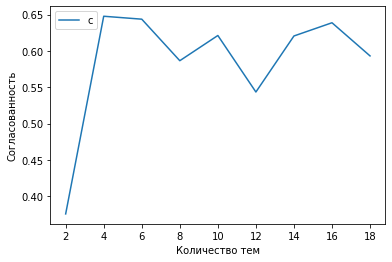

In [169]:
limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Количество тем")
plt.ylabel("Согласованность")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [92]:
len(model_list)

9

In [105]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_list[5], corpus_bt, dictionary_bt)
vis

C:\Users\sych_\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.133201 -0.041748       1        1  10.372996
7     -0.140657 -0.089828       2        1   9.872701
4     -0.143019 -0.066265       3        1   9.284271
10    -0.051308 -0.041416       4        1   8.930780
3      0.092282  0.176673       5        1   8.592504
11    -0.096857 -0.005314       6        1   8.340693
0      0.100398  0.111273       7        1   8.326881
2     -0.058136 -0.030182       8        1   8.260416
6      0.104277  0.223894       9        1   7.755749
8      0.321821 -0.255536      10        1   7.437490
5     -0.002714  0.079766      11        1   6.764335
9      0.007113 -0.061317      12        1   6.061186, topic_info=     Category         Freq                                   Term  \
5503  Default  4324.000000                        client_whatsapp   
244   Default  3305.000000                        выдавать_ошибка   
1158  Default  3601.000000                                 пароль   
4789  Default  3054.000000                                   this   
5505  Default  3053.000000                                this_is   
5512  Default  3053.000000                              with_this   
5507  Default  3053.000000                               to_start   
5504  Default  3053.000000                         system_message   
233   Default  2647.000000                           рабочий_стол   
235   Default  2706.000000                              удалённый   
1671  Default  4934.000000                              поставщик   
1639  Default  2448.000000                       удалённый_доступ   
232   Default  2320.000000                                рабочий   
187   Default  4467.000000                                  зайти   
243   Default  2041.000000                               выдавать   
878   Default  2715.000000                           подключиться   
82    Default  2666.000000                                 доступ   
1946  Default  2575.000000                                принять   
646   Default  1895.000000                                      a   
2622  Default  1712.000000                               whatsapp   
1904  Default  1689.000000                                 system   
1899  Default  1687.000000                                message   
234   Default  1704.000000                                   стол   
3306  Default  1508.000000                             ошибка_пко   
4790  Default  1614.000000                                     to   
52    Default  1584.000000                                     is   
3035  Default  1568.000000                                 client   
132   Default  2401.000000                                   цена   
2504  Default  1538.000000                                  start   
5511  Default  1535.000000                                   with   
...       ...          ...                                    ...   
4288  Topic12   455.246979                        специалист_дать   
4290  Topic12   453.554108                     стараться_улучшить   
4286  Topic12   453.553955                               сервис_–   
414   Topic12   866.409302                                    пко   
681   Topic12   362.777252                                 family   
732   Topic12   313.752869                                   span   
654   Topic12   276.282166                                calibri   
2375  Topic12   415.642212                             смк_группа   
728   Topic12   244.167572                            serif_color   
662   Topic12   240.348618                                  color   
726   Topic12   238.771317                                  serif   
761   Topic12   243.797165                                оценить   
4289  Topic12   230.787247                              стараться   
3669  Topic12   229.917236                               улучшить   
2829  Topic12   226.953125 

In [100]:
model_list[1].get_document_topics(corpus_bt)[0]

[(0, 0.12545055), (1, 0.20613174), (2, 0.13187757), (3, 0.53654015)]

In [103]:
 model_list[1].get_topics()

array([[3.3896621e-03, 5.6661613e-04, 2.4193004e-03, ..., 5.0229773e-06,
        5.0077524e-06, 5.0093099e-06],
       [5.4080260e-06, 1.1946358e-03, 2.0538077e-03, ..., 3.9953939e-06,
        3.9735050e-06, 3.9744564e-06],
       [1.6714481e-05, 3.2173409e-04, 2.4938614e-03, ..., 7.2496987e-06,
        7.2395724e-06, 7.2426815e-06],
       [9.9738396e-04, 8.3608110e-04, 4.4113179e-03, ..., 4.0635769e-04,
        1.4203452e-04, 2.7950434e-04]], dtype=float32)

In [96]:
corpus_bt[0]

[(0, 1),
 (1, 2),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 2),
 (6, 1),
 (7, 2),
 (8, 2),
 (9, 2),
 (10, 2)]

После нахождения наилучшей модели, с самой большой согласованность, сохраним ее и все сопутствующие к ней данные:
- Словарь,
- Корпус
- Устойчивые выражения

In [104]:
# Сохраняем модель
model_list[5].save('model/best_model.lda')
# Сохраняем словарь
from gensim import corpora
corpora.Dictionary.save(dictionary_bt, "model/dictionary.dict")
# Сохраняем корпус
corpora.BleiCorpus.save_corpus(fname="model/corpus.lda-c",corpus= corpus_bt)
# Сохраняем выражения 
bigram.save('./model/bigram.phs')
trigram.save('./model/trigram.phs')

In [222]:
!pip install pyLDAvis

  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97715 sha256=a4834f767cfe6b16629ef2473c7c1241e5b5f91ab651c67ff0901195a04d1010
  Stored in directory: C:\Users\sych_\AppData\Local\pip\Cache\wheels\98\71\24\513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32045 sha256=75219d64bf4fbf72d4ecc47802cf2af4f0eb2f4630ebfc43e5d3d6116483a709
  Stored in directory: C:\Users\sych_\AppData\Local\pip\Cache\wheels\20\5a\d8\1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [33]:
#Поиск доминирующей темы в каждом тексте
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [87]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=corpus_bt, texts=text_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10.0,0.1860,"сервис, работа, данный_момент, дать, качество_...","[сломаться, ноготь, сломать, ноготь, сломать, ..."
1,1,4.0,0.2585,"выдавать_ошибка, фото_—, фото, ерп, выдавать, ...","[сок, протечь, сломать, ноутбук, ерп, висеть, ..."
2,2,4.0,0.2085,"выдавать_ошибка, фото_—, фото, ерп, выдавать, ...","[работать, ерп, работать, ерп, ерп, упасть, на..."
3,3,4.0,0.3119,"выдавать_ошибка, фото_—, фото, ерп, выдавать, ...","[ерп, ерп, ерп, чинить, сволочь, зависнуть, ер..."
4,4,4.0,0.4789,"выдавать_ошибка, фото_—, фото, ерп, выдавать, ...","[висеть, ерп, висеть, ерп, весить, erp, висеть..."
5,5,4.0,0.4789,"выдавать_ошибка, фото_—, фото, ерп, выдавать, ...","[висеть, ерп, висеть, ерп, весить, erp, висеть..."
6,6,4.0,0.4954,"выдавать_ошибка, фото_—, фото, ерп, выдавать, ...","[загружаться, заказ, висеть, ерп, проверить, в..."
7,7,4.0,0.4954,"выдавать_ошибка, фото_—, фото, ерп, выдавать, ...","[загружаться, заказ, висеть, ерп, проверить, в..."
8,8,4.0,0.4954,"выдавать_ошибка, фото_—, фото, ерп, выдавать, ...","[загружаться, заказ, висеть, ерп, проверить, в..."
9,9,7.0,0.1620,"документ, просить_помочь, провести, отчёт, оши...","[заказ, загружаться, заказ, загружаться, заказ..."


In [88]:
#Распределение тем по документам.
#Наконец, мы хотим понять объем и распределение тем, чтобы понять, насколько широко это обсуждалось.
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head(20)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,10.0,"сервис, работа, данный_момент, дать, качество_...",1877.0,0.0525
1,4.0,"выдавать_ошибка, фото_—, фото, ерп, выдавать, ...",3424.0,0.0958
2,4.0,"выдавать_ошибка, фото_—, фото, ерп, выдавать, ...",2615.0,0.0731
3,4.0,"выдавать_ошибка, фото_—, фото, ерп, выдавать, ...",3329.0,0.0931
4,4.0,"выдавать_ошибка, фото_—, фото, ерп, выдавать, ...",4205.0,0.1176
5,4.0,"выдавать_ошибка, фото_—, фото, ерп, выдавать, ...",3084.0,0.0862
6,4.0,"выдавать_ошибка, фото_—, фото, ерп, выдавать, ...",4082.0,0.1142
7,4.0,"выдавать_ошибка, фото_—, фото, ерп, выдавать, ...",3231.0,0.0904
8,4.0,"выдавать_ошибка, фото_—, фото, ерп, выдавать, ...",1790.0,0.0501
9,7.0,"документ, просить_помочь, провести, отчёт, оши...",4472.0,0.1251


In [89]:
#Поиск наиболее представительного документа для каждой темы
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.8890,"подключиться_удалённый, подключиться, код, ссы...","[подписание, документ, эцп, оператор, возникат..."
1,1.0,0.9253,"пароль, зайти, удалённый_доступ, доступ, учётн...","[ар00, ар00, ар00, ар00, ар00, ар00, ар00, ар0..."
2,2.0,0.8695,"позиция, рц, задача, поставщик, цб_рц, база, ч...","[здравствовать, вопрос, заказ, поставщик, венг..."
3,3.0,0.9927,"база, сервер, группа, группа_абд, 1с, самбрать...","[недоступный, база, вещевой, довольствие, srv,..."
4,4.0,0.8586,"выдавать_ошибка, фото_—, фото, ерп, выдавать, ...","[пз, кросс, док, кмс, реализация, товар, услуг..."
5,5.0,0.8636,"рабочий_стол, рабочий, удалённый, компьютер, с...","[здравствовать, работать, удалёнка, подключить..."
6,6.0,0.9160,"принять, поставщик, всд, приёмка, эник, постав...","[здравствовать, выходить, вкладка, заполнить, ..."
7,7.0,0.8981,"документ, просить_помочь, провести, отчёт, оши...","[сп, поярковый, подсказать, значит, ставить, п..."
8,8.0,0.9510,"client_whatsapp, this, with_this, to_start, th...","[this, is, system, message, which, allows, to,..."
9,9.0,0.7981,"касса, поставщик, сей_пора, сервис_деск, 1с, п...","[формироваться, отчёт, qlikview, сравнительный..."
